# Problem 4
### 1.

In [37]:
import numpy as np
import random

def coins_w_sensor(sims):

    flips = [(random.choice(['H', 'T']), random.choice(['H', 'T'])) for _ in range(sims)]   # Simulate two coin flips
    pairs = ['equal' if flip[0] == flip[1] else 'different' for flip in flips]  # Determine if they are equal or different, instead of 0/1
    #print(pairs)

    reports = []
    for i in range(len(pairs)):
        R = random.random()
        #print(R)
        if R <= 0.9:    # 90% chance to report correctly
            reports.append(pairs[i]) # Keep same result
        else:
            reports.append('equal' if pairs[i] == 'different' else 'different') # Flip result

    return pairs, reports

pair, report = coins_w_sensor(10**6) # 10^6 simulations
#print(report)

### 2.

In [41]:
print(f"P(R=1) (report equal) = {report.count('equal') / len(report)}")
print(f"P(equal | R=1) = {sum(1 for i in range(len(report)) if report[i] == 'equal' and pair[i] == 'equal') / report.count('equal')}")

P(R=1) (report equal) = 0.500226
P(equal | R=1) = 0.89933550035384


### 3.

The differences between the values above and the analytic values found in Part I are very close, differing absolutely by only:

In [42]:
print(f"Absolute difference to P(R=1): {np.abs(0.5 - report.count('equal') / len(report))}")
print(f"Absolute difference to P(equal | R=1): {np.abs(0.9 - sum(1 for i in range(len(report)) if report[i] == 'equal' and pair[i] == 'equal') / report.count('equal'))}")

Absolute difference to P(R=1): 0.00022599999999994846
Absolute difference to P(equal | R=1): 0.0006644996461599995


### 4.

Conditioning on a noisy report can change posterior probabibilities significantly even with a low noise rate because the probability space shifts to dealing with new events. In our example, the original probability is 50/50, but once we knew that one of the events had occurred, the test was (still) 90% accurate. Even if the original probability was much lower, say 1%, once the report has occurred, we are now considering the probability of true positives versus false positives, which is NOT the original probability space of the event in the first place.

# Problem 5

P(R) = 0.1
P(R) = 0.07
P(R) = 0.099
P(R) = 0.0913
P(R) = 0.09079
P(R) = 0.091871


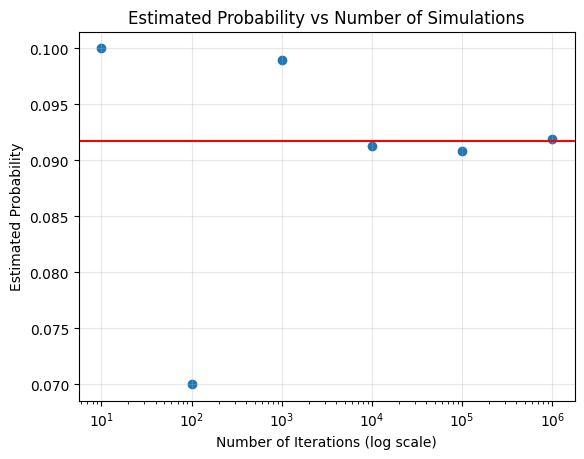

In [30]:
import random
import matplotlib.pyplot as plt

def two_stage_screen(init_good_prob):

    item = '' 
    fail = False

    R1 = random.random()
    if R1 <= init_good_prob: # initial probabilities
        item = 'good'
    else:
        item = 'bad'

    # Stage 1 screening
    if item == 'good':
        R2a = random.random()
        if R2a <= 0.08:
            fail = True
    else: # item == 'bad'
        R2b = random.random()
        if R2b <= 0.95:
            fail = True

    # Stage 2 screening
    if fail:
        if item == 'good':
            R3a = random.random()
            if R3a <= 0.98:
                fail = False
        else: # item == 'bad'
            R3b = random.random()
            if R3b <= 0.05:
                fail = False


    return item, fail



sims = [10**i for i in range(1, 7)]  # 10, 100, 1000, 10000, 100000, 1000000
probabilities = []
for i in range(len(sims)):
    fail_count = 0
    for sim in range(sims[i]):
        item, fail = two_stage_screen(0.9)
        if fail:
            fail_count += 1
            #print(f"Item: {item}, Failed screening: {fail}")

    probabilities.append(fail_count / sims[i])
    print(f"P(R) = {fail_count / sims[i]}")

# Plotting estimated probabilities vs number of iterations
plt.figure(1)
plt.scatter(sims, probabilities)
plt.axhline(y=0.09169, color='r', label='Analytical P(R)')
plt.xscale('log')
plt.xlabel('Number of Iterations (log scale)')
plt.ylabel('Estimated Probability')
plt.title('Estimated Probability vs Number of Simulations')
plt.grid(True, alpha=0.3)
plt.show()

P(R) = 0.3
P(R) = 0.44
P(R) = 0.473
P(R) = 0.4555
P(R) = 0.45208
P(R) = 0.452749


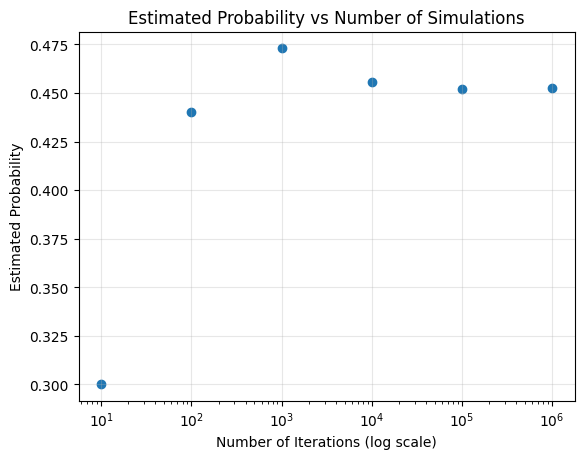

In [31]:
sims = [10**i for i in range(1, 7)]  # 10, 100, 1000, 10000, 100000, 1000000
probabilities = []
for i in range(len(sims)):
    fail_count = 0
    for sim in range(sims[i]):
        item, fail = two_stage_screen(0.5)
        if fail:
            fail_count += 1
            #print(f"Item: {item}, Failed screening: {fail}")

    probabilities.append(fail_count / sims[i])
    print(f"P(R) = {fail_count / sims[i]}")

# Plotting estimated probabilities vs number of iterations
plt.figure(1)
plt.scatter(sims, probabilities)
#plt.axhline(y=0.09169, color='r', label='Analytical P(R)')
plt.xscale('log')
plt.xlabel('Number of Iterations (log scale)')
plt.ylabel('Estimated Probability')
plt.title('Estimated Probability vs Number of Simulations')
plt.grid(True, alpha=0.3)
plt.show()